In [1]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
data_utils.download_data_gdown("./") # gdrive-ckip
# 使用 GPU：
#    1. 安裝 tensorflow-gpu (請見安裝說明)
#    2. 設定 CUDA_VISIBLE_DEVICES 環境變數，例如：os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#    3. 設定 disable_cuda=False，例如：ws = WS("./data", disable_cuda=False)
# 使用 CPU：
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: C:\Users\lenovo\data.zip
100%|██████████| 1.88G/1.88G [01:41<00:00, 18.5MB/s]
D:\anaconda3\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
D:\anaconda3\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
D:\anaconda3\lib\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras

In [ ]:
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from itertools import chain

year = 1952

while year < 1986:
    try:
        # test.txt 是我们需要读入的繁体文本，如果遇到无法解码的错误，用errors跳过
        f = open('./twt_text/' + str(year) + '.txt', encoding='utf-8', errors="ignore")
    except:
        year += 1
        continue

    sentences = ''
    for line in f.readlines():
        line = re.sub('\n','',line)  #去掉列表中每一个元素的换行符
        line = re.sub('[a-zA-Z0-9]','',line) #去掉数字，字母
        sentences += line

    sentence_list = re.split(r'[，,。.]', sentences) #获得句子的list

    f.close()

    word_sentence_list = ws(
        sentence_list,
        # sentence_segmentation = True, # To consider delimiters
        # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimiters
        # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
        # coerce_dictionary = dictionary2, # words in this dictionary are forced
    )

    pos_word_sentence_list = pos(word_sentence_list)

    word_list = list(chain.from_iterable(word_sentence_list))
    
    pos_word_list = list(chain.from_iterable(pos_word_sentence_list))

    # 分词后用空格隔开每个单词
    word_string = ''
    for j in range(len(word_list)):
        if pos_word_list[j] == 'Nb' and len(word_list[j]) != 1 and word_list[j] != '中共':
            word_string += word_list[j] + ' '



    wc = WordCloud(
      height=300,
      width=500,
      background_color='white',        #   背景顏色
      max_words=30,                    #  最大分詞數量
      mask=None,                       #   背景圖片
      max_font_size=None,              #   顯示字體的最大值
      font_path='./KAIU.TTF',          # 若為中文則需引入中文字型(.TTF)
      random_state=None,               #   隨機碼生成各分詞顏色
      prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例
    wc.generate(word_string) 
    wc.to_file('./tianwentai_Nb_cloud/'+ str(year) + '.png') 
    year += 1
    



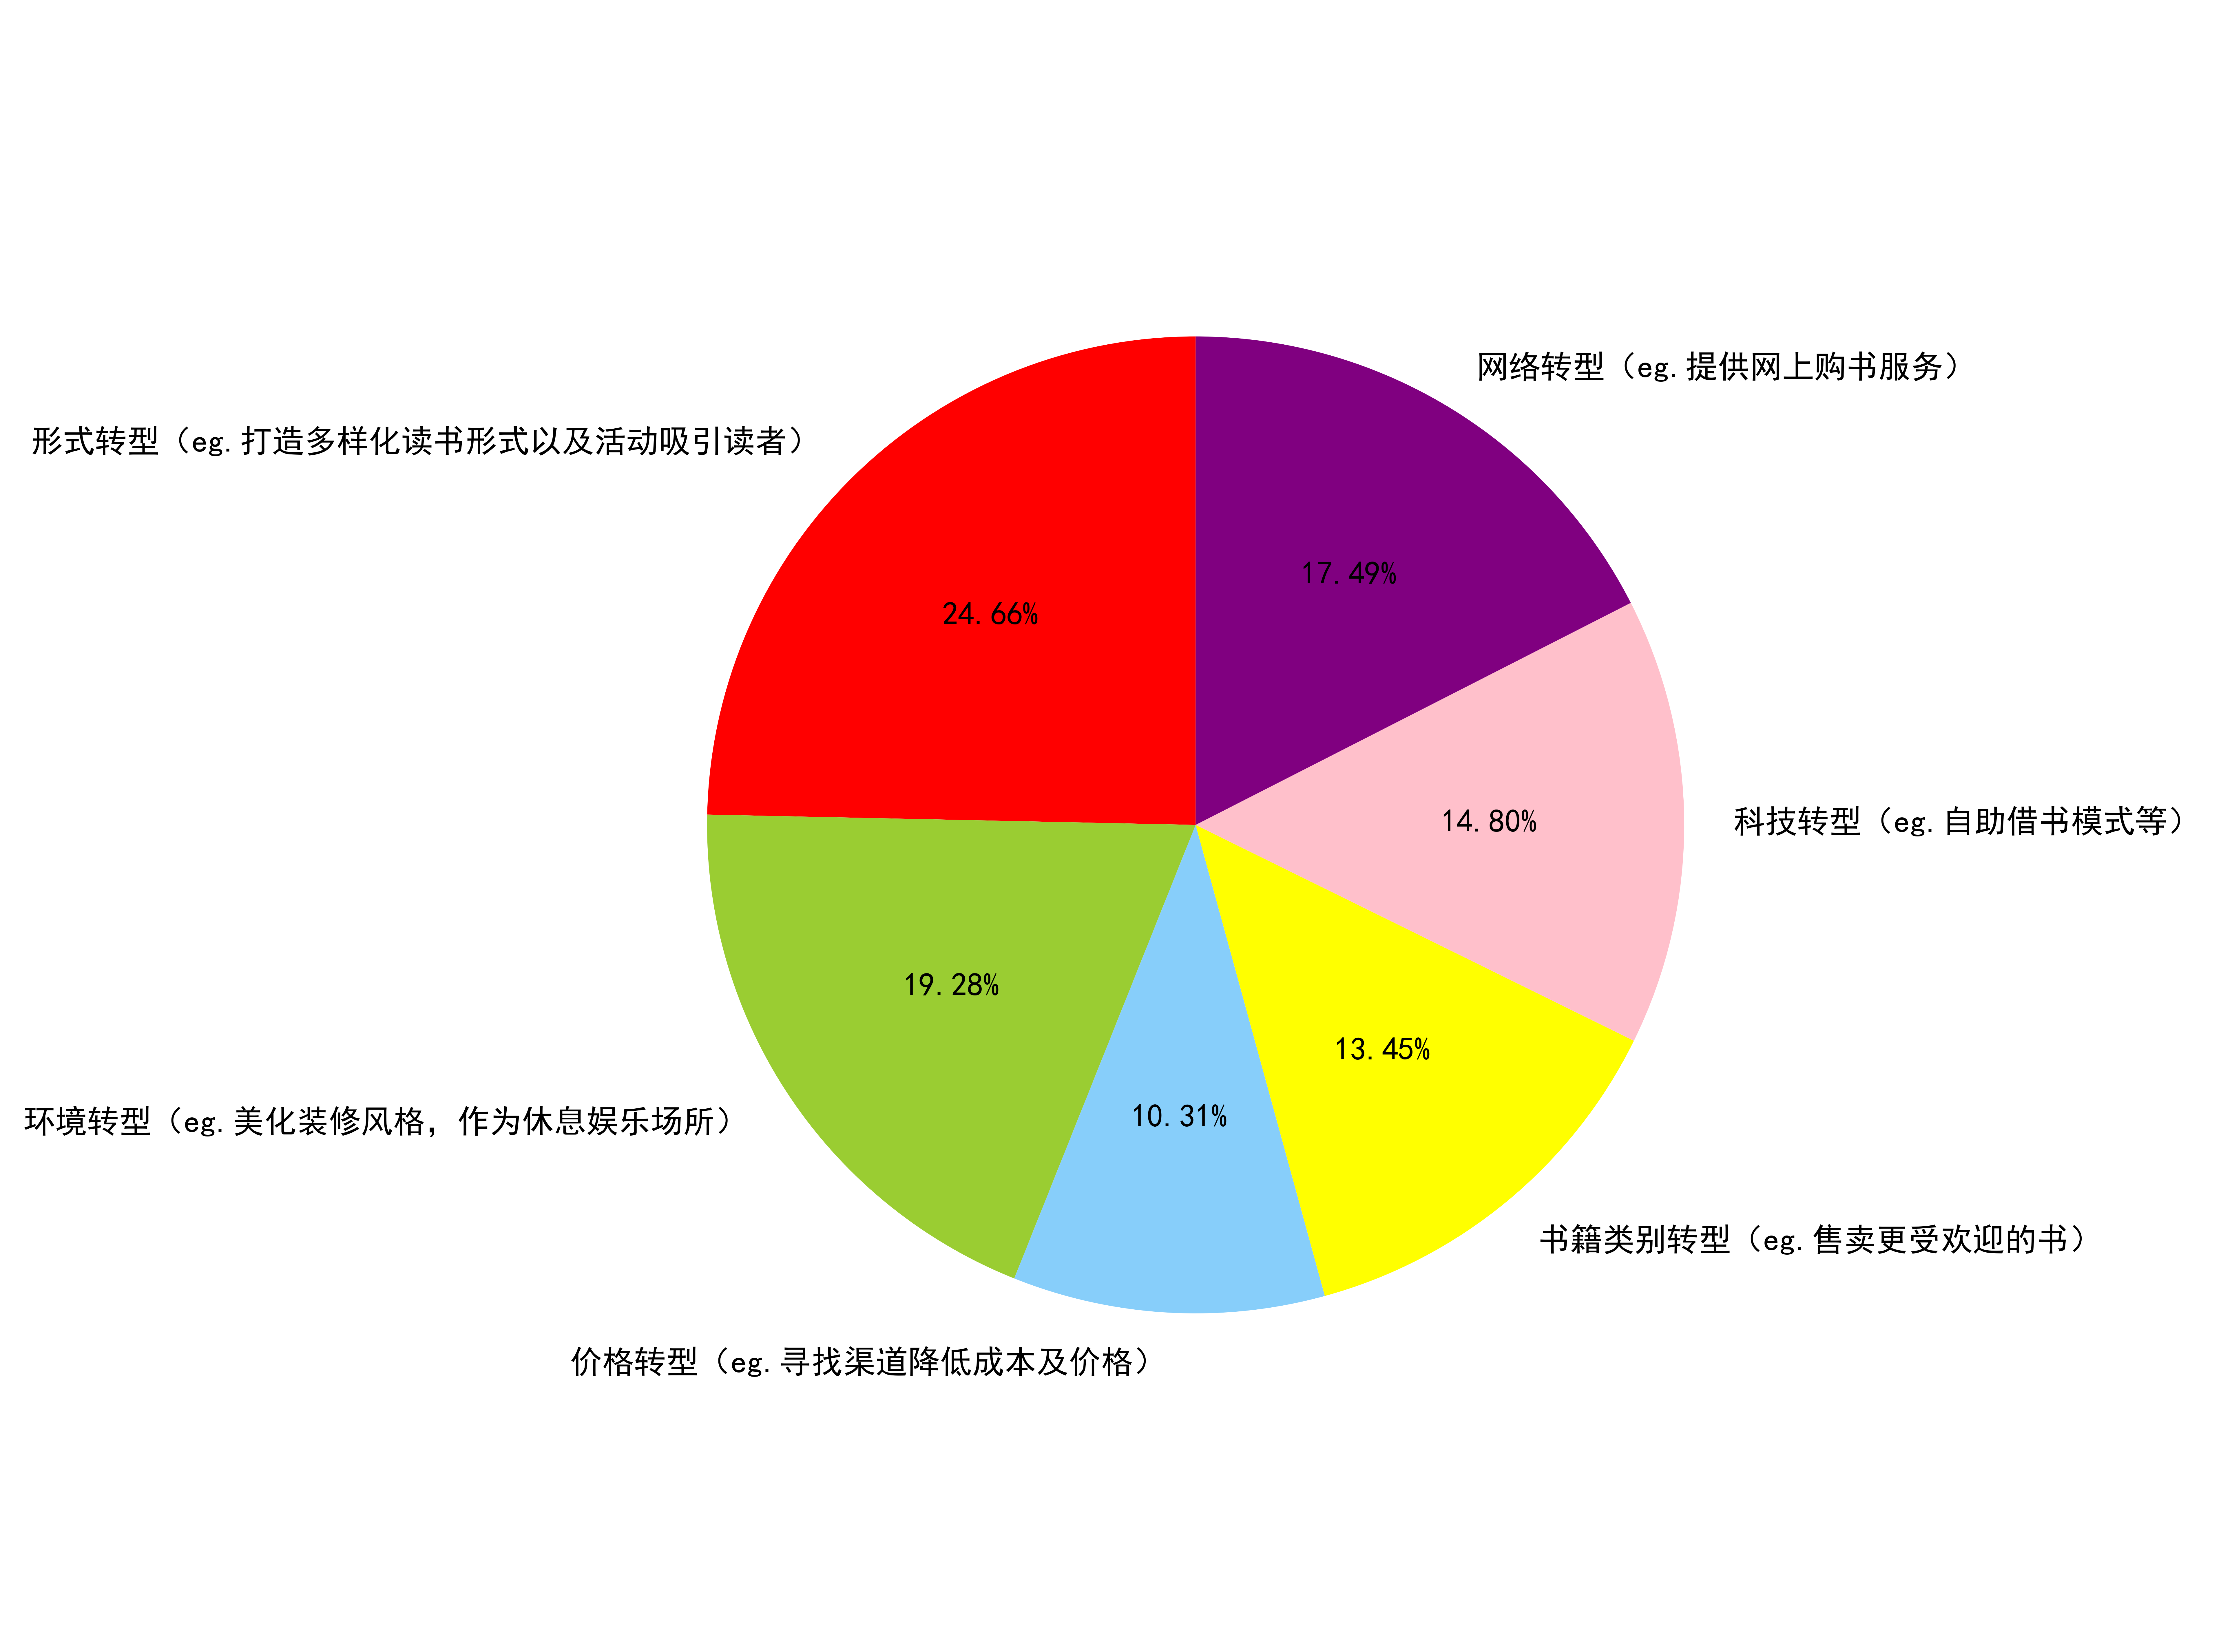

In [116]:

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #解决中文乱码

plt.figure(figsize=(6,9)) #调节图形大小
tmpx = ['形式转型（eg.打造多样化读书形式以及活动吸引读者）','环境转型（eg.美化装修风格，作为休息娱乐场所）','价格转型（eg.寻找渠道降低成本及价格）','书籍类别转型（eg.售卖更受欢迎的书）','科技转型（eg.自助借书模式等）','网络转型（eg.提供网上购书服务）']

tmpy = [55,43,23,30,33,39]

colors = ['red','yellowgreen','lightskyblue','yellow','pink','purple'] #每块颜色定义
# explode = (0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
plt.pie(tmpy,
#                       explode=explode,
                      labels=tmpx,
                      colors=colors,
                      shadow = False, #无阴影设置
                      autopct = '%3.2f%%', #数值保留固定小数位
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.xticks(size = 7)
plt.rcParams['savefig.dpi'] = 800 #图片像素
plt.rcParams['figure.dpi'] = 800 #分辨率
plt.show()
